# NumPy

NumPy is a library for linear algebra and a bit of probability. Central object in NumPy is NumPy array.

## Why is NumPy so cool?

Python's default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran. 

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element. For example, imagine we have an array of values and we'd like to compute the reciprocal of each. 

It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.



# Operations

NumPy offers implementations of operations with vectors and matrices. Some of them are:

## Dot product
Dot product takes two vectors and multiply them element-wise.
Vectors have to have the same length.

![Dot product](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/dot_product.png?raw=1)


## Matrix multiplication = "Generalized" dot product

Row of first matrix is dot-producted with column of second matrix to get one element from resulting matrix.
Inner dimensions of matrices must match.

![Matrix multiplication](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/matrix_multiplication.png?raw=1)

Just like with the vector dot product, there are some limitations on the shapes of the matrices that you want to multiply, in particular the number of columns, and they must equal to the number of rows.

## Element-Wise product
Elements on corresponding places in matrices are multiplied. Both matrices need to have the same shape.

![Element-wise product](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/element-wise_product.png?raw=1)

# Python lists vs NumPy arrays

In most programming, languages such as C++, Java, Ruby and so forth, **arrays** are the go to method of storing items in a sequential data structure. In a python, however, **lists** take on that role. And a somewhat confusingly, they do have a lot of similarities, like the way you access an item in a python list is the same way you would normally access an array.





In [ ]:
import numpy as np

Let's create a list containing the items one, two, three.

In [ ]:
L = [1, 2, 3]

Now let's create an array containing the same items.

In [ ]:
A = np.array([1, 2, 3])

Now we would like to do something with each element of both of them. Let's try to loop over elements and print them.

In [ ]:
for item in L:
  print(item)

for item in A:
  print(item)

1
2
3
1
2
3


So far, things are the same. Now we would like to do another common task: add new item to list or array.

In [ ]:
L.append(4)
L
A.append(4)
A

AttributeError: ignored

There is no method called append() for NumPy array. Generally speaking, **size of list can change, but size of array is fixed**. There are other ways to kind of add items to array, but they actually create a new array. 

Another way is to simply add two lists together. 

In [ ]:
L + [5]

[1, 2, 3, 4, 5]

In [ ]:
A + np.array([4])

array([5, 6, 7])

Well, this is not really working. It seems, that element 4 got added to each element of array A. That is called **broadcasting**. Numerically, it makes no sence to add two vectors of different sizes, but in NumPy this makes perfect sence. NumPy is all about effective math, so it takes operator `+` as addition and add element 4 to each element of array. This saves as trouble of repeating element 4 to match size of array.

In [ ]:
A + 4

array([5, 6, 7])

But what if I want to add two vectors?

In [ ]:
A + np.array([4, 5, 6])

array([5, 7, 9])

It seems, that NumPy is smart enough to do element wise addition in this case with two vectors. Can we add two arrays with different sizes?

In [ ]:
A + np.array([4, 5])

ValueError: ignored

Well, no. That just makes perfect sence, because we cannot add vectors of different sizes.

Let's go to other operation - **multiplication**. If I have a vector `A` and multiply it by `2`, it will give me two times every element of that vector. 

In [ ]:
2 * A

array([2, 4, 6])

What about multiplying list?

In [ ]:
2 * L

[1, 2, 3, 4, 1, 2, 3, 4]

It gives us list `L` repeated two times.

With lists, the **multiply** operator does repetition while for arrays, it does multiplication.

Now, let's say for some reason, we really want to use a list to do vector addition or multiplication or we are not allowed to use NumPy, that might be the case, for example, if you're taking a class on C++ or JavaScript. The most basic way is to use a `for` loop.

So let's say we want to add `3` to each element in `L` and store it into `L2`.

In [ ]:
L2 = []
for e in L:
  L2.append(e + 3)
L2

[4, 5, 6, 7]

Another way you could do this is with list comprehensions.

In [ ]:
L2 = [e + 3 for e in L]
L2

[4, 5, 6, 7]

One nice thing about this is that it's a very flexible. Let's say we wanted to square each element.

In [ ]:
L3 = [e**2 for e in L]
L3

[1, 4, 9, 16]

But this would be way easier in NumPy.

In [ ]:
A**2

array([1, 4, 9])

This brings up another important aspect of NumPy:  if you ever apply a function to an array, it very often operates element wise.

You can take square root.

In [ ]:
np.sqrt(A)

array([1.        , 1.41421356, 1.73205081])

Or log.

In [ ]:
np.log(A)

array([0.        , 0.69314718, 1.09861229])

# The Dot Product

![Dot product](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/dot_product.png?raw=1)

To start, let's create some one dimensional arrays so we have some data to work with.

In [ ]:
a = np.array([1, 2])
b = np.array([3, 4])

Now, the first thing we can try, if you didn't know anything about an NumPy, is to use the direct definition: we want to multiply two arrays element-wise and sum those results together.

In [ ]:
dot = 0
for e, f in zip(a, b):
  dot += e * f
dot

11

Another important operation in NumPy is indexing. We might loop through elements of NumPy array using indices.

In [ ]:
dot = 0
for index in range(len(a)):
  dot += a[index] * b[index]
dot

11

Now, of course, at this point, you might wonder what will happen if I use the usual multiply operator to multiply `a` and `b`.

In [ ]:
a * b

array([3, 8])

As we might have expected, it did element-wise multiplication. However, we can use this result since the `dot` product is just the sum of these elements.

In [ ]:
np.sum(a * b)

11

Nice thing about NumPy is that a lot of these functions are also instance methods, so you can call them on NumPy array object directly.

In [ ]:
(a * b).sum()

11

This was just an exercise. There is an actual dedicated function in NumPy for doing `dot` products called `dot()`.

In [ ]:
np.dot(a, b)

11

Just like above, the `dot()` function is also an instance method.

In [ ]:
a.dot(b)

11

In a newer versions of NumPy, there's an operator you can apply that does the `dot` function as well, but uses a symbol `@`.

In [ ]:
a @ b

11

Now, if you studied linear algebra and geometry, you know that there's an alternative definition of the `dot` product, namely that the product of `a` and `b` is equal to the magnitude of `a` times the magnitude of `b` times the cosine of the angle between `a` and `b`.

![Alternative dot product](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/alternative_dot.png?raw=1)

In [ ]:
def norm(a):
  sum = (a*a).sum()
  return np.sqrt(sum)

In [ ]:
norm(a)

2.23606797749979

Being such a fundamental operation, NumPy already have a function to do this. It's located in the module `linalg`, which, as you can tell by its name, contains linear algebra tools.

In [ ]:
np.linalg.norm(a)

2.23606797749979

So now that you know how to find the norm of a vector, we can calculate the cosine of the angle.

In [ ]:
def cosine(a, b):
  return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
cosine(a, b)

0.9838699100999074

To get an actual angle, we need to do and arc cosine

In [ ]:
np.arccos(cosine(a, b))

0.17985349979247847

# The Speed Test

We are going to do a little speed test to measure exactly how much faster NumPy `dot()` function is compared to regular python computation of the `dot` product.

We're going to calculate the `dot` product using both methods 100 000 times and when we're done, we're going to calculate the ratio between the times.

In [ ]:
from datetime import datetime

def list_dot_product(a, b):
  dot = 0
  for e, f in zip(a, b):
    dot += e * f
  return dot

T = 100000
len = 100
np_a = np.random.randn(len)
np_b = np.random.randn(len)

t0 = datetime.now()
for t in range(T):
  list_dot_product(np_a, np_b)
dt1 = datetime.now() - t0

t0 = datetime.now()
for t in range(T):
  np_a.dot(np_b)
dt2 = datetime.now() - t0

print("dt1/dt2: ", dt1.total_seconds() / dt2.total_seconds())

dt1/dt2:  56.39699101853139


NumPy `dot()` function is about 64 times faster. Generaly, using NumPy functions is orders of magnitude faster then using for loops.

# Matrices

As we can think of one dimensional arrays as vectors, we can think of two dimensional arrays as matrices. 

First, let's start with the fact that there is an actual object in NumPy called `matrix`, but this is not recommended to use. Basically a matrix by definition must be two dimensional, whereas an NumPy array can be any dimensional. So if you ever see a matrix out in the wild, you should probably convert it to an array first before you do any processing.

Let's start with our basic python programming skills. If we were not using NumPy arrays, how would we represent a matrix? Typically by a list of lists.

In [ ]:
L = [[1, 2], [3, 4]]
L

[[1, 2], [3, 4]]

So this is a two by two matrix where the first row is one two and the second row is three, four.

## Indexing

The first thing we want to figure out is array access. How do I get the value at row zero, column one, for example?

Since this is a list of lists, we can do `L[0]` to get a first row of `L`.

In [ ]:
L[0]

[1, 2]

By convention, we say that rows come first, then columns. 

Now that we have one whole row, we can get an element at column one from this row

In [ ]:
L[0][1]

2

Let's now see how we can do this in NumPy.

In [ ]:
A = np.array(L)
A

array([[1, 2],
       [3, 4]])

What's nice about NumPy array is that when this list is printed out, it's actually formatted like a matrix,

In [ ]:
A[0][1]

2

This works. But conveniently, we can also just use the notation `A[0, 1]` instead.

In [ ]:
A[0, 1]

2

All right, so this is already better than using lists, but here's where NumPy arrays get very powerful. What if we wanted to select a column of this matrix? Then we can use the colon notation.

In [ ]:
A[:, 0]

array([1, 3])

So this returned column at index 0. And `:` means select everything in this dimension. So in our case, it means select every row.

## Operations with matrices

Transpose of a matrix.

In [ ]:
A.T

array([[1, 3],
       [2, 4]])

Now, here's something interesting, let's say I want to apply a function to `A` like the exponential - it works just like a vector where it applies element wise.

In [ ]:
np.exp(A)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

Now, let't try it with a list.

In [ ]:
np.exp(L)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

So what's interesting about this is that NumPy already knows what your list represents and treats it as if it were an array. In addition, the thing you get back is an actual NumPy array.

All right, so let's take a look at some more Matrix operations, one of the most fundamental operations is matrix multiplication.

In [ ]:
B = np.array([[1, 2, 3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
A.dot(B)

array([[ 9, 12, 15],
       [19, 26, 33]])

Now, you might wonder why is it a `dot` B and not a `*` B. As you may recall, the `*` does element-wise multiplication, which is not the same as matrix multiplication. And as we mentioned earlier, matrix multiplication is a generalization of the `dot` product.

In matrix multiplication, the inner dimensions must match. So let's see what happens if we break that rule.

In [ ]:
A.dot(B.T)

ValueError: ignored

Let's look at a few more matrix operations.

Determinant.

In [ ]:
np.linalg.det(A)

-2.0000000000000004

Matrix inverse.

In [ ]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

And we can check that this is, in fact, the inverse by multiplying the result by the original and as you know, we should get back identity.

In [ ]:
A.dot(np.linalg.inv(A))

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

Now, you might wonder, what's this funny looking number where we expect to see a zero? The algorithms that we use to actually compute these operations are not exact. So always be careful when you're using the matrix inverse and think about whether you actually need to do it or if your equation can be simplified.

Matrix trace.

In [ ]:
np.trace(A)

5

## Diagonal

One kind of interesting overloaded function is the `diag()` function. If we use it on matrix, we get a vector containing the diagonal elements.

In [ ]:
np.diag(A)

array([1, 4])

But when we call `diag()` on a vector, we get a matrix which has the input vector on the diagonal and zeros elsewhere. This is, by the way, called the diagonal matrix.

In [ ]:
np.diag([1, 4])

array([[1, 0],
       [0, 4]])

So just keep in mind that this function is overloaded. If you put in a matrix, you get a vector, and if you put in a vector, you're going to matrix.

## Comparison

In [ ]:
A.dot(np.linalg.inv(A)) == [[1, 0], [0, 1]]

array([[ True,  True],
       [False, False]])

So interestingly, we get back an array containing two true and two false. This might be surprising to you since equals equals just returns a true or false. But in fact, like many NumPy operators, this too operates element wise. Both the left hand side and right hand side are matrices, and therefore we're comparing two matrices with the `==`.

We would expect all true, but this is due to numerical precision, since computers don't have an infinite amount of memory, they can't have an infinite amount of precision and therefore, numbers have to be rounded off at some point.

In NumPy, the correct way to compare whether to arrays or equal is to use the NumPy `allclose()` function.

In [ ]:
np.allclose(A.dot(np.linalg.inv(A)), [[1, 0], [0, 1]])

True

# Solving linear systems

Solving linear systems is a very common problem in all areas of science and engeneering.

## Linear system: Example problem

The admission fee at at a small fair is a \\$1.50 for children and \\$4.00 for adults. On a certain day, 2200 people enter the fair, and \\$5050 is collected. How many children and how many adults entered?

In order to solve this problem, we are going to create two variables:
 - $x_1$ to represent number of childer
 - $x_2$ to represent number of adults

Translating the word problem into math, we get that:

$x_1 + x_2 = 2200$  
$1.5x_1 + 4x_2 = 5050$

Since we have a system of two equations and two unknowns, we know that we can solve this problem.





## Linear systems in Matrix form

If we let $x$ be a vector contaning $x_1$ and $x_2$, this becomes a matrix equality. We call this kind of problem a linear system.

![Linear system matrix](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/linear_system_matrix.png?raw=1)

The solution to this is just to multiply both sides be an inverse of $A$ and we get that $x = A^{-1}b$.

![Linear system matrix solution](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/linear_system_matrix_solution.png?raw=1)


## Don't do that literaly

Unfortunately, this is not how you should solve this kind of problem in code. Algorithm used to find and inverse is both slower and less accurate that is needs to be. 

Linear system can be solved using a different algorithm that is both faster and more accurate. That algorithm is implemented in `np.linalg.solve()` function.

In [ ]:
A = np.array([[1, 1], [1.5, 4]])
b = np.array([2200, 5050])

In [ ]:
np.linalg.solve(A, b)

array([1500.,  700.])

And we got the answer: 1500 children and 700 adults.

# Generating data

If we want to generate data with hundreds or thousands dimensions, typing things by hand is clearly not a feasible solution. Often, data comes from Excel files of CSV files, but sometimes we need to generate large matrices whose values have nothing to do with the data.

 - One example of that is with neural networks. A neural network is made up of many large matrices which you will randomly initialize and then train using an algorithm called back propagation.
 - Another common reason to create your own arrays is to generate synthetic data to test your algorithm on.

Often, using synthetic data is extremely useful because it allows us to test the efficacy of our models. Since you generated the data yourself, you know the true answer and you can see how close your model gets to that true answer.

## All the same values

Let's start with somethins simple - an array of all zeros. In order to create an array of all zeros, we call the function `np.zeros()` and we pass it a touple specifying the desired size of an array.

In [ ]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

We can do the same thing if we want an array of ones. We just call the `ones()` function instead.

In [ ]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

Now, what if we want an array of a different number, like 10? Well, there isn't a function called `tens()`, but remember that anything multiplied by one is just that thing.

In [ ]:
10 * np.ones((2, 3))

array([[10., 10., 10.],
       [10., 10., 10.]])

## Identity matrix

One important, the matrix and linear algebra is the identity matrix. The identity matrix is the matrix analog of the number one - that's why when you take a matrix and multiply it by its inverse, you get identity. In NumPy, the function to create an identity matrix is called `eye()`.

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Arrays with random numbers

Arrays with random numbers are used pretty much everywhere, from Deep learning to Markov chain Monte carlo. NumPy has a module called `random`, that contains functionality for this. The simples way to do this is with function called `random()`.

In [ ]:
np.random.random()

0.22844375947598372

If we pass in a tuple for the shape, we get back a random array of that shape.

In [ ]:
np.random.random((2, 3))

array([[0.80352118, 0.93822752, 0.14807938],
       [0.80861763, 0.03638709, 0.38729164]])

## Distribution

Now, whenever you create random numbers, it's always important to ask: **what distribution to those random numbers come from?**

For example, the numbers you get from a uniform distribution will be different from the numbers you get from a normal distribution. And typically, when you're generating random data, you want to generate that data from a specific distribution.

For example, if you want to have a mix of both positive and negative numbers, you wouldn't want to use the `random()` function since that draws from the uniform (0, 1) distribution.

One common technique for determining, what distribution your random numbers came from, is to visualize the numbers in a histogram. If your random numbers came from the distribution you think they did, then they're histograms should look like the distribution.

Another pretty common scenario is that we want to draw numbers from the normal distribution, also known as the Gaussian, in order to do that we use a function called `randn()`.

In [ ]:
np.random.randn(2, 3)

array([[-0.12732041,  0.97516533,  1.15816742],
       [-0.08268478, -1.08939203, -0.19874674]])

This function draws random numbers from the standard normal distribution, meaning that this data has mean zero and variance one.

What's very odd about the randon function is that unlike `zeros()` and `ones()` in `random`, this function does not accept a tuple as input for the shape. Instead, each dimension is passed in as a separate argument. So you just have to remember this little detail about the NumPy library.

## Some statistic

Let's generate a big, long array of 10000 numbers drawn from the standard normal distribution.

In [ ]:
R = np.random.randn(10000)

We can calculate the mean of this array by calling `R.mean()`.

In [ ]:
R.mean()

-0.004366706115371606

It's pretty close to zero as expected.

And as with a few other functions, this is also a top level function as well as an instance method. So we can do also this.

In [ ]:
np.mean(R)

-0.004366706115371606

We can also calculate the variance using `R.var()`.

In [ ]:
R.var()

1.0072610863603408

And we get an answer very close to one as expected.

sometimes we want the standard deviation instead of the variance, which there is a special function for called `std()`.

In [ ]:
R.std()

1.003623976577055

We get the square root of the variance. We can also check that this really is a square root of the variance.

In [ ]:
np.allclose(R.var(), np.square(R.std()))

True

Another common scenario is if I have a matrix of random data Let's say the a matrix of size 10 000 x 3, where each element is drawn from the standard normal distribution.

In [ ]:
R = np.random.randn(10000, 3)

Although we could calculate the mean of this entire array, what do we usually want to do is calculate the mean of each row, or the mean of each column.

So if we do `mean(axis=0)`, this calculates the mean of each column.

In [ ]:
R.mean(axis=0)

array([ 0.0049889 , -0.00598632,  0.0014232 ])

The output is a length 3 array. 

If we use `axis=1`, this calculates the mean of each row.

In [ ]:
R.mean(axis=1)

array([ 0.7939416 , -0.30044362,  0.15197519, ...,  0.08972327,
        0.57509968, -0.71186604])

We get a big, long array, so in order to check its shape, we can call `shape`.

In [ ]:
R.mean(axis=1).shape

(10000,)

And we see that it's ten thousand as expected.

## Arrays in machine learning

Typically, when you're working with data in machine learning, it's usually organized so that each row is a sample or an observation and each column is a specific measurement. In our case, we would have ten thousand observations and three measurements per observation.

And as an example of that, let's say I want to compare some attributes of people in some kind of psychology experiment:
- each row would represent a person, like Alice, Bob Caro and so forth.
- each column would represent a measurement like, say, ratings out of 10 for specific traits like openness, conscientiousness, extraversion, agreeableness and neuroticism.

![Measurements](https://github.com/katarinagresova/MLprojects/blob/main/DeepLearningPrerequisites/assets/images/measurements.png?raw=1)

Each row of the matrix is a vector observation and so when you have vectors, the analog of the variance is the covariance. There is a function called cov in NumPy.

In [ ]:
np.cov(R)

array([[ 2.51235502,  0.0602919 ,  0.35049185, ...,  0.44382257,
        -0.17640864,  0.88773996],
       [ 0.0602919 ,  0.28773128,  0.11470055, ..., -0.13330932,
        -0.41820302,  0.37016414],
       [ 0.35049185,  0.11470055,  0.08835845, ...,  0.00846807,
        -0.17830561,  0.25336817],
       ...,
       [ 0.44382257, -0.13330932,  0.00846807, ...,  0.1507954 ,
         0.17700404, -0.01860229],
       [-0.17640864, -0.41820302, -0.17830561, ...,  0.17700404,
         0.6109901 , -0.56678835],
       [ 0.88773996,  0.37016414,  0.25336817, ..., -0.01860229,
        -0.56678835,  0.738796  ]])

This gives us a very large array. So let's check its shape.

In [ ]:
np.cov(R).shape

(10000, 10000)

The `cov()` function by default treats each column as a vector observation. And by the way, this is not the convention at the rest of the NumPy stack (scikit-learn, tensorflow, pytorch, ...). But we can easily fix this by transposing our array.

In [ ]:
np.cov(R.T)

array([[ 0.98324195,  0.00441823, -0.01920292],
       [ 0.00441823,  1.00993393,  0.01533995],
       [-0.01920292,  0.01533995,  1.00863025]])

And this is a 3x3 matrix, as expected and also as expected, it's close to identity (because we have a random data).

## Random integers

NumPy has a function for it called `randint()`. If we look at the documentation, we see that this function takes in a few arguments:
- `low`: which is the minimum integer you want to randomly sample.
- `high`: which is the maximum integer you want to randomly sample.
- `size`: you can generate a single number or you can generate an array of any size

Notice that `low` is inclusive, while `high` is exclusive, that follows the same convention as everything else in Python.

In [ ]:
np.random.randint(0, 10, (2, 3))

array([[9, 6, 8],
       [1, 9, 7]])

## Random choice

Another useful function is the `choice()` function, which randomly selects items from a one dimensional input array. If we look at the arguments, we see that there are a few: 
- `a`: the input array, which is the thing you want to randomly selected from. Pptionally you can also just pass in an integer. And if you pass in an integer `N`, you'll get random numbers from zero up to an exclusive.
- size: Output shape, int or tuple of ints. If the given shape is, e.g., `(m, n, k)`, then `m * n * k` samples are drawn. Default is None, in which case a single value is returned.
- `replace`: boolean, useful for situations like bootstrapping, where you actually want to be able to randomly select the same item more than once.
- `p`: allows you to specify at what probabilities each item should be selected.

In [ ]:
np.random.choice(10, size=(2, 3))

array([[2, 8, 0],
       [8, 6, 5]])

This behaves the same as `randint()`.

# Excercise: matrix multiplication speed test

Do a speed comparison for matrix multiplication with using numpy function versus using python list operations.

Bonus: how does time increase with the the size of input?

Firs, we will create a function for computing matrix multiplication using python list operation. We can do it using three nested loops:
 - two for looping through result matrix
 - third for computing one value of result

In [ ]:
def list_matrix_mult(a, b): 
  result = np.zeros((a.shape[0], a.shape[0]))

  for i in range(a.shape[0]):
    for j in range(a.shape[0]):
      for k in range(a.shape[1]):
        result[i, j] += a[i, k] * b[k, j]

  return result


To test, if our function is correct, we can compare it with results from NumPy matrix multiplication.

In [ ]:
a = np.random.randint(0, 10, (2, 3))
b = np.random.randint(0, 10, (3, 2))

In [ ]:
list_matrix_mult(a, b)

array([[66., 72.],
       [65., 66.]])

In [ ]:
np.dot(a, b)

array([[66, 72],
       [65, 66]])

It looks like we have the same results.

Now we can create function that will compute matrix multiplication 100 000 times both ways and will compare a time it takes.

In [ ]:
from datetime import datetime

def compare_matrix_mult(a_rows, a_columns):
  T = 100000
  a = np.random.randint(0, 10, (a_rows, a_columns))
  b = np.random.randint(0, 10, (a_columns, a_rows))

  t0 = datetime.now()
  for t in range(T):
    list_matrix_mult(a, b)
  dt1 = datetime.now() - t0

  t0 = datetime.now()
  for t in range(T):
    a.dot(b)
  dt2 = datetime.now() - t0

  return dt1.total_seconds(), dt2.total_seconds()

In [ ]:
list_time, numpy_time = compare_matrix_mult(2, 3)
list_time / numpy_time

23.8680515822367

We can see that list computation of matrix multiplication is more that 20 times slower than NumPy function. Even for result matrix with only 2 rows and 2 columns.

We were clever enough to make matrix dimensions an input parameter, so now we can create a function that will show how does time increase with the the size of input.

In [ ]:
import matplotlib.pyplot as plt

def plot_times():

  input_size = []
  list_times = []
  numpy_times = []
  a_column = 2

  for a_row in range(2, 21, 1):
    input_size.append(a_row)
    list_time, numpy_time = compare_matrix_mult(a_row, a_column)
    list_times.append(list_time)
    numpy_times.append(numpy_time)

  plt.plot(input_size, list_times, label="list operations")
  plt.plot(input_size, numpy_times, label="NymPy")
  plt.xlabel("result dimension")
  plt.ylabel("time")
  plt.show()

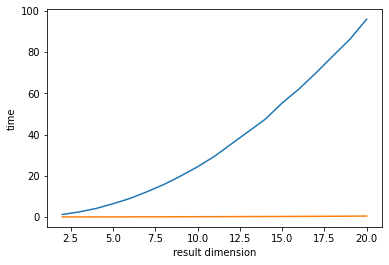

In [ ]:
plot_times()

Oh wou! 

NumPy matrix multiplication seems to have linear time consumption compared to result dimenstions. However, implementation using list operetions is way slower and is getting even slower with bigger input matrix.

Matrix multiplication is the heart of the deep neural network. And since we are using milions of matrix multiplication when training neural networks, we would like to do them smartly so it will not take forewer.